<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-forest-approach-on-COVID-19-dataset" data-toc-modified-id="Random-forest-approach-on-COVID-19-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Random forest approach on COVID 19 dataset</a></span></li><li><span><a href="#Explanation-video-is-available-on-youtube" data-toc-modified-id="Explanation-video-is-available-on-youtube-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explanation video is available on youtube</a></span></li><li><span><a href="#Acknowledgements-for-Data-used" data-toc-modified-id="Acknowledgements-for-Data-used-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Acknowledgements for Data used</a></span></li><li><span><a href="#Installation-and-importing-of-required-packages/-libraries" data-toc-modified-id="Installation-and-importing-of-required-packages/-libraries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Installation and importing of required packages/ libraries</a></span></li><li><span><a href="#Load-data-stored-in-a-location" data-toc-modified-id="Load-data-stored-in-a-location-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data stored in a location</a></span></li><li><span><a href="#Converting-the-data-to-a-format-ready-for-the-machine-learning-steps" data-toc-modified-id="Converting-the-data-to-a-format-ready-for-the-machine-learning-steps-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Converting the data to a format ready for the machine learning steps</a></span></li><li><span><a href="#drop-columns-to-select-a-state-of-your-interest." data-toc-modified-id="drop-columns-to-select-a-state-of-your-interest.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>drop columns to select a state of your interest.</a></span></li><li><span><a href="#Arrange-columns-in-the-order-of-date,-confirmed,-deceased-and-recovered." data-toc-modified-id="Arrange-columns-in-the-order-of-date,-confirmed,-deceased-and-recovered.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Arrange columns in the order of date, confirmed, deceased and recovered.</a></span></li><li><span><a href="#Generate-profile-reports-for-a-quick-review-of-the--data-set" data-toc-modified-id="Generate-profile-reports-for-a-quick-review-of-the--data-set-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Generate profile reports for a quick review of the  data set</a></span></li><li><span><a href="#Generate-feature-and-target-variables" data-toc-modified-id="Generate-feature-and-target-variables-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Generate feature and target variables</a></span></li><li><span><a href="#Splitting-of-data-to-train-and-test-vectors" data-toc-modified-id="Splitting-of-data-to-train-and-test-vectors-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Splitting of data to train and test vectors</a></span></li><li><span><a href="#Initialize-random-forest-classifiers-.-Training-and-prediction-on-test-samples." data-toc-modified-id="Initialize-random-forest-classifiers-.-Training-and-prediction-on-test-samples.-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Initialize random forest classifiers . Training and prediction on test samples.</a></span></li><li><span><a href="#Hyperparameter-tuning-with-Random-Serch-CV-method" data-toc-modified-id="Hyperparameter-tuning-with-Random-Serch-CV-method-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Hyperparameter tuning with Random Serch CV method</a></span></li><li><span><a href="#Plotting-of-results-and-comparison-of-results-obtained-with-different-RF-approaches" data-toc-modified-id="Plotting-of-results-and-comparison-of-results-obtained-with-different-RF-approaches-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Plotting of results and comparison of results obtained with different RF approaches</a></span></li><li><span><a href="#Visualization-of-Results" data-toc-modified-id="Visualization-of-Results-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Visualization of Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Random forest approach on COVID 19 dataset
This notebook (open in Jupyer notebook in python 3) gives you a basic understanding on
- How to read COVID dataset from https://www.covid19india.org/ web page
- Convert the data base available to a form suited for applying machine learning techniques
- How Random Forest approach can be employed on the dataset and a comparison of performance based on variants of random forest approaches including Random Search CV
- Comparison based on Performance measures 

# Explanation video is available on youtube 

https://www.youtube.com/channel/UCP35aGSzN43U5TgiE8qPg7g


![Intercog - Youtube channel Subscrice and share for more videos](together_logo.png)

                            Intercog - Subscribe and share the Channel for more videos


# Acknowledgements for Data used 

@misc{covid19indiaorg2020tracker,
  author = {COVID-19 India Org Data Operations Group},
  title = ,
  howpublished = {Accessed on 2020-11-13 from \url{https://api.covid19india.org/}},
  year = 2020
}


web link for data https://api.covid19india.org/csv/latest/state_wise_daily.csv

# Installation and importing of required packages/ libraries

In [1]:
!pip install sweetviz
!pip install dask
!pip install scikit-learn
!pip install pandas_profiling

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime
import sweetviz as sv
import pandas_profiling
#import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Load data stored in a location

Download data from https://api.covid19india.org/csv/latest/state_wise_daily.csv and store in your computer.

__Update the location in cell below according to the file location and file name__

In [3]:
india = pd.read_csv('D:\Youtube channel_Intercog\COVID_19_Random_forest\state_wise_daily_fromCovid19website.csv')

# Converting the data to a format ready for the machine learning steps

In [4]:
india.columns = map(str.lower, india.columns)
# convert all column heads to lower case letters

In [5]:
india.columns

Index(['date', 'date_ymd', 'status', 'tt', 'an', 'ap', 'ar', 'as', 'br', 'ch',
       'ct', 'dn', 'dd', 'dl', 'ga', 'gj', 'hr', 'hp', 'jk', 'jh', 'ka', 'kl',
       'la', 'ld', 'mp', 'mh', 'mn', 'ml', 'mz', 'nl', 'or', 'py', 'pb', 'rj',
       'sk', 'tn', 'tg', 'tr', 'up', 'ut', 'wb', 'un'],
      dtype='object')

# drop columns to select a state of your interest.

In this note book Kerala is selcted 'kl' is the column name corresponding to kerala. If you wish to try for other state, drop columns except your state of interest.

In [6]:
dropopcolumn=['date', 'tt', 'an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dn', 'dd', 'dl', 'ga', 'gj', 'hr', 'hp', 'jk', 'jh', 'ka', 'la', 'ld', 'mp', 'mh', 'mn', 'ml', 'mz', 'nl', 'or', 'py', 'pb', 'rj', 'sk', 'tn', 'tg', 'tr', 'up', 'ut', 'wb', 'un']
india.drop(dropopcolumn,axis=1,inplace=True) #remove duplicate date format
india.head()

,date_ymd,status,kl
0,2020-03-14,Confirmed,19
1,2020-03-14,Recovered,3
2,2020-03-14,Deceased,0
3,2020-03-15,Confirmed,5
4,2020-03-15,Recovered,0


In [7]:
len(india) # as the data base was downloaded on 13 th Noveber 2020, you may get a different length due to additions after this date

735

# Arrange columns in the order of date, confirmed, deceased and recovered. 

In [8]:
kerala=india.pivot(index='date_ymd',columns='status',values='kl').sort_values('date_ymd')
#Convert pivoted table to normal dataframe
#kerala.columns = kerala.columns.droplevel(0) #remove amount
kerala.columns.name = None               #remove categories
kerala = kerala.reset_index()                #index to columns
kerala.head()

,date_ymd,Confirmed,Deceased,Recovered
0,2020-03-14,19,0,3
1,2020-03-15,5,0,0
2,2020-03-16,3,0,0
3,2020-03-17,0,0,0
4,2020-03-18,0,0,0


In [9]:
kerala['date_index'] = np.arange(len(kerala))
kerala.head()

,date_ymd,Confirmed,Deceased,Recovered,date_index
0,2020-03-14,19,0,3,0
1,2020-03-15,5,0,0,1
2,2020-03-16,3,0,0,2
3,2020-03-17,0,0,0,3
4,2020-03-18,0,0,0,4


# Generate profile reports for a quick review of the  data set

In [10]:
my_report1 = sv.analyze(kerala)# command to generate profile report
my_report1.show_html() #this will show report 


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
profile = pandas_profiling.ProfileReport(india)
profile.to_file("india.html") # generate profile report in pandas profiling and store in parent directory

# Generate feature and target variables

__In this note book Random forest method to predict number of deceased from the number of confirmed and recovered cases is done__ 

In [12]:
features = ['Confirmed','Recovered','date_index']
target = ['Deceased']
X = kerala[features] # generate feature vector as X
y = kerala[target] # generate tagret vector as y

Text(0.5, 1.0, 'Correlation between features')

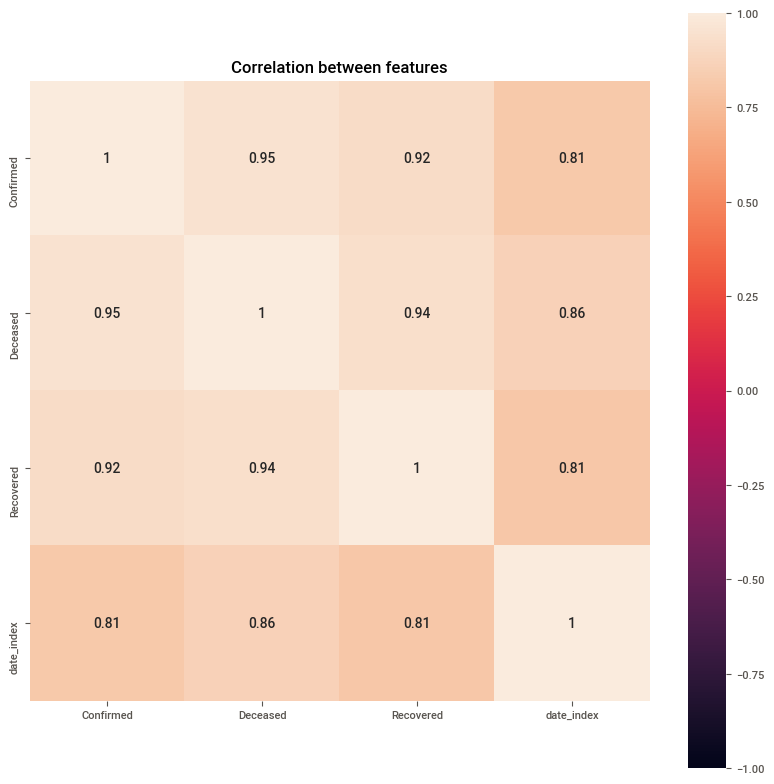

In [13]:
corr = kerala.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

# Splitting of data to train and test vectors

80% data used for training and 20% for tesing 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Initialize random forest classifiers . Training and prediction on test samples.

In [15]:
model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train, y_train)
y_pred_test_rf = model_rf.predict(X_test)
print("predicted deceased with RF",y_pred_test_rf)

<ipython-input-15-fb82422aa930>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


predicted deceased with RF [ 0  0 23 25  0 20  0  1 28  0  1  1  1  0  7  9 14  0  0  1 23  0  2 11
  2  0 25  1  0 25 25  0  0 20  0  2  0  0  0 27  2  0 12 20  0  1  0  0
  0]


In [16]:
model1_rf = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1_rf.fit(X_train, y_train)
y_pred1_test_rf = model_rf.predict(X_test)
print("predicted deceased with RF with parameter specified",y_pred1_test_rf)

predicted deceased with RF with parameter specified [ 0  0 23 25  0 20  0  1 28  0  1  1  1  0  7  9 14  0  0  1 23  0  2 11
  2  0 25  1  0 25 25  0  0 20  0  2  0  0  0 27  2  0 12 20  0  1  0  0
  0]


<ipython-input-16-7c87409fd195>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1_rf.fit(X_train, y_train)


# Hyperparameter tuning with Random Serch CV method

In [17]:
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 100
model_rf_tuned = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [18]:
model_rf_tuned.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]})

In [19]:
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)

In [20]:
X_test.index


Int64Index([ 67, 244, 207, 221,  90, 219,  58, 127, 229,   4,  78,  85,  95,
            112, 173, 160, 182,  51,  27,  73, 220,  34, 117, 184, 119, 118,
            241, 123,  38, 211, 239,  44,  62, 233, 102, 138,  39,  31,  18,
            238, 120,  19, 186, 227,  33,  91,  35,  11,  29],
           dtype='int64')

In [21]:
y_test.index

Int64Index([ 67, 244, 207, 221,  90, 219,  58, 127, 229,   4,  78,  85,  95,
            112, 173, 160, 182,  51,  27,  73, 220,  34, 117, 184, 119, 118,
            241, 123,  38, 211, 239,  44,  62, 233, 102, 138,  39,  31,  18,
            238, 120,  19, 186, 227,  33,  91,  35,  11,  29],
           dtype='int64')

In [22]:
y_test.head

<bound method NDFrame.head of      Deceased
67          0
244         0
207        22
221        26
90          1
219        21
58          0
127         2
229        26
4           0
78          0
85          0
95          0
112         0
173        10
160        12
182        15
51          0
27          0
73          1
220        24
34          0
117         0
184        15
119         2
118         0
241        28
123         1
38          0
211        25
239        24
44          0
62          0
233        21
102         0
138         2
39          0
31          0
18          0
238        28
120         2
19          0
186        14
227        24
33          0
91          0
35          0
11          0
29          0>

# Plotting of results and comparison of results obtained with different RF approaches

In [23]:
# dataframe generation with tesing samples, predicted results(prediction of deceased number) with each method and actual value of deceased
resultx=X_test
resultx.reset_index(drop=True)
resultx=resultx.assign(predicted_y_rf_tuned=y_pred_test_rf_tuned)
resultx=resultx.assign(predicted_y_rf=y_pred_test_rf)
y1=y_test
result = resultx.merge(y1, left_index=True, right_index=True)
y2=y_pred_test_rf
result.head()

,Confirmed,Recovered,date_index,predicted_y_rf_tuned,predicted_y_rf,Deceased
67,24,5,67,0,0,0
244,0,0,244,0,0,0
207,10606,6161,207,23,23,22
221,8369,6839,221,23,25,26
90,78,32,90,1,0,1


In [24]:
# Precision score comarison
precision_tuned = precision_score(y_test,y_pred_test_rf_tuned,pos_label='positive',average='weighted')
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred1_test_rf))
print('Precision score for normally tuned model for test data:', precision_tuned)


Accuracy score for test data using the model without parameter specification: 0.5510204081632653
Accuracy score for test data using the model with parameter specification: 0.5510204081632653
Precision score for normally tuned model for test data: 0.6530612244897959


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Evaluating the Algorithms Random Forest No tuning

print('Mean Absolute Error Random Forest No tuning:', metrics.mean_absolute_error(y_test, y_pred1_test_rf)) 
print('Mean Absolute Error Random Forest with tuning:', metrics.mean_absolute_error(y_test, y_pred_test_rf_tuned))
 


Mean Absolute Error Random Forest No tuning: 0.7551020408163265
Mean Absolute Error Random Forest with tuning: 1.2040816326530612


In [26]:
# Evaluating the Algorithm Random Forest with tuning

print('Mean Squared Error Random Forest No tuning:', metrics.mean_squared_error(y_test, y_pred1_test_rf))   
print('Mean Squared Error Random Forest with tuning:', metrics.mean_squared_error(y_test, y_pred_test_rf_tuned))  


Mean Squared Error Random Forest No tuning: 1.7346938775510203
Mean Squared Error Random Forest with tuning: 5.816326530612245


In [27]:
print('Root Mean Squared Error Random Forest No tuning:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1_test_rf)))
print('Root Mean Squared Error Random Forest with tuning:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rf_tuned)))

Root Mean Squared Error Random Forest No tuning: 1.3170777796132696
Root Mean Squared Error Random Forest with tuning: 2.411706145162019


In [28]:
val= [ ( accuracy_score(y_test,y_pred1_test_rf), metrics.mean_absolute_error(y_test, y_pred1_test_rf),metrics.mean_squared_error(y_test, y_pred1_test_rf),np.sqrt(metrics.mean_squared_error(y_test, y_pred1_test_rf))),
        ( accuracy_score(y_test,y_pred_test_rf_tuned), metrics.mean_absolute_error(y_test, y_pred_test_rf_tuned),metrics.mean_squared_error(y_test, y_pred_test_rf_tuned),np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rf_tuned)))]
        
perfmeasure = pd.DataFrame(val, columns=[ 'Accuracy Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

In [29]:
perfmeasure.head()

,Accuracy Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,0.551020,0.755102,1.734694,1.317078
1,0.571429,1.204082,5.816327,2.411706


# Visualization of Results

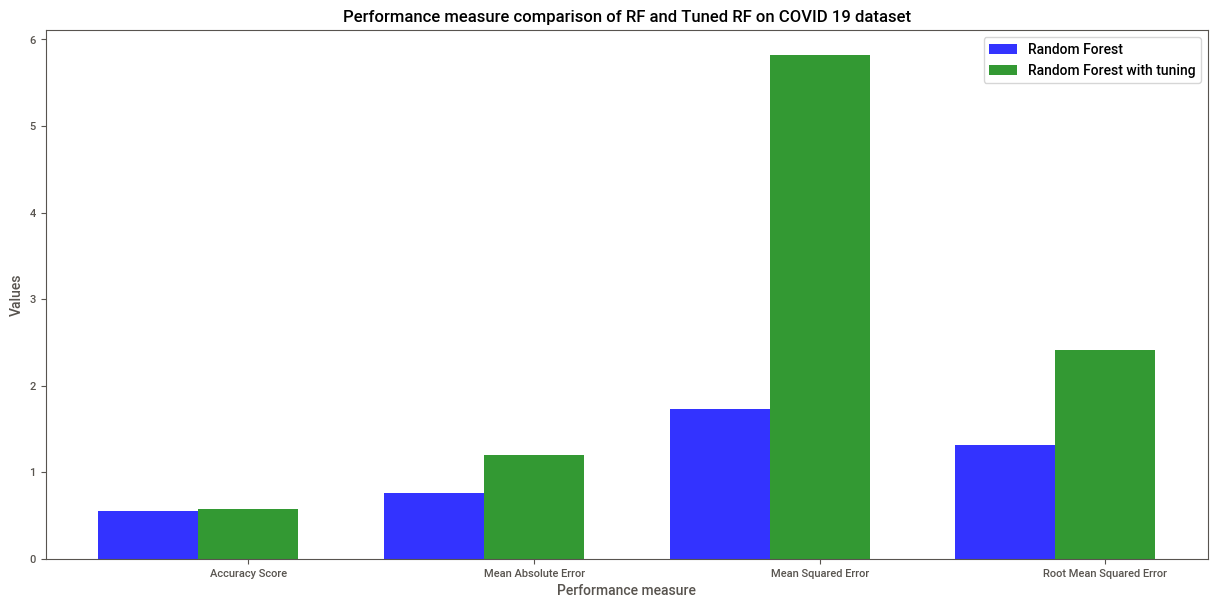

In [30]:
# create plot
fig, ax = plt.subplots(figsize=(15,7))
index = np.arange(4)
bar_width = 0.35
opacity = 0.8
figsize=(15, 7)
rects1 = plt.bar(index, perfmeasure.iloc[0, : ], bar_width,
alpha=opacity,
color='b',
label='Random Forest')

rects2 = plt.bar(index + bar_width, perfmeasure.loc[1, : ], bar_width,
alpha=opacity,
color='g',
label='Random Forest with tuning')

plt.xlabel('Performance measure')
plt.ylabel('Values')
plt.title('Performance measure comparison of RF and Tuned RF on COVID 19 dataset')
plt.xticks(index + bar_width, ('Accuracy Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'))
plt.legend()



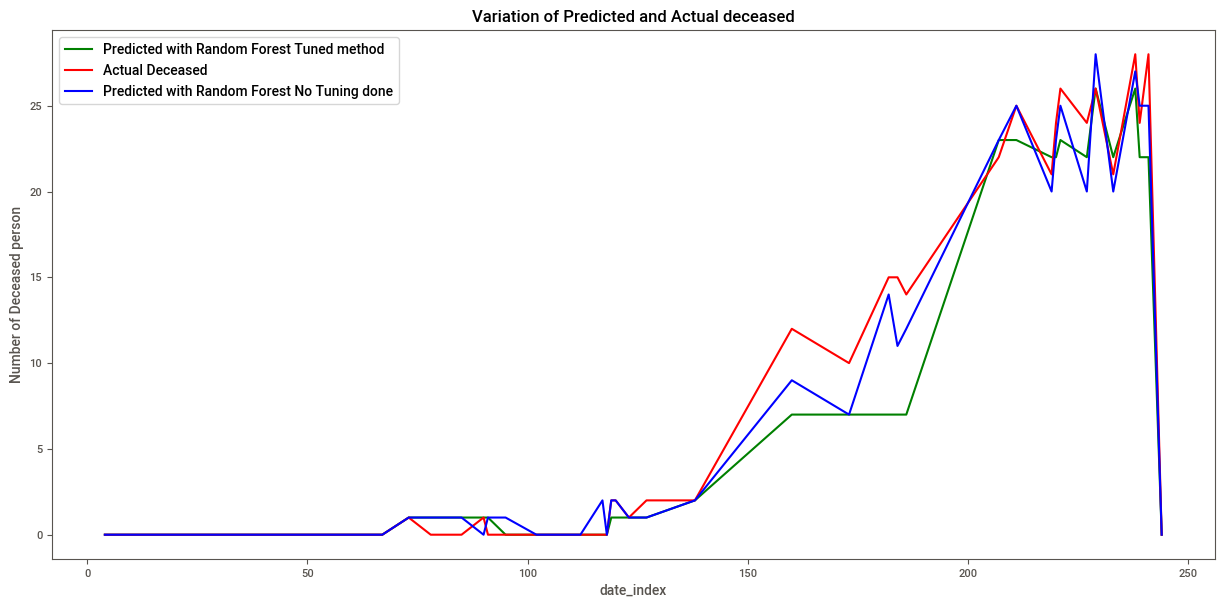

In [31]:
result.groupby(['date_index'])['predicted_y_rf_tuned'].mean().plot(kind='line', figsize=(15, 7), color='green')
result.groupby(['date_index'])['Deceased'].mean().plot(kind='line', figsize=(15, 7), color='red')
result.groupby(['date_index'])['predicted_y_rf'].mean().plot(kind='line', figsize=(15, 7), color='blue')

plt.ylabel('Number of Deceased person')
plt.title('Variation of Predicted and Actual deceased')
plt.legend(['Predicted with Random Forest Tuned method', 'Actual Deceased','Predicted with Random Forest No Tuning done'])

# Conclusion
Performance comparison of Random forest method for covid data shows that the method is not much promising, with high MSE and RMSE values. The accuracy score also is less than 60%. Models like time series modelling may be considered for further improvements.